In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D,Input,Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
dirs = os.listdir("./data/")

In [3]:
print dirs

['horses', 'cats', 'dogs', 'Humans']


In [4]:
path = "./data/"

In [5]:
images = []
labels = []

In [6]:
label_dict = {"cats":0,"dogs":1,"horses":2,"Humans":3}

In [7]:
for ix in dirs:
    img_path = path + ix + "/"
    img_names = os.listdir(img_path)
    for im in img_names:
        img = image.load_img(img_path+im,target_size=(224,224))
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label_dict[ix])

print (len(images),len(labels))

(808, 808)


In [8]:
combined = list(zip(images,labels))
random.shuffle(combined)

images[:],labels[:] = zip(*combined)

In [9]:
X_train = np.array(images)
Y_train = np.array(labels)
y_train = np_utils.to_categorical(Y_train)

In [10]:
print (X_train.shape,y_train.shape)

((808, 224, 224, 3), (808, 4))


In [11]:
res_model = ResNet50(include_top=False,weights='imagenet', input_shape=(224,224,3))

/home/vasu/.local/lib/python2.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [12]:
av1 = GlobalAveragePooling2D()(res_model.output)
fc1 = Dense(256, activation='relu')(av1)
d1 = Dropout(0.25)(fc1)
out = Dense(4, activation='softmax')(d1)

tl_model = Model(inputs=res_model.input,outputs=out)
tl_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
for ix in range(175):
    tl_model.layers[ix].trainable = False

In [14]:
tl_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

res3c_branch2a (Conv2D)         (None, 28, 28, 128)  65664       activation_16[0][0]              
__________________________________________________________________________________________________
bn3c_branch2a (BatchNormalizati (None, 28, 28, 128)  512         res3c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 28, 28, 128)  0           bn3c_branch2a[0][0]              
__________________________________________________________________________________________________
res3c_branch2b (Conv2D)         (None, 28, 28, 128)  147584      activation_17[0][0]              
__________________________________________________________________________________________________
bn3c_branch2b (BatchNormalizati (None, 28, 28, 128)  512         res3c_branch2b[0][0]             
__________________________________________________________________________________________________
activation

In [15]:
adam = Adam(lr = 0.00003)

In [16]:
tl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
hist = tl_model.fit(X_train,y_train,epochs=5,shuffle=True,batch_size=64,validation_split=0.20)

Train on 646 samples, validate on 162 samples
Epoch 1/5
646/646 [==============================] - 89s 137ms/step - loss: 0.5214 - acc: 0.8050 - val_loss: 0.0964 - val_acc: 0.9506
Epoch 2/5
646/646 [==============================] - 54s 84ms/step - loss: 0.1277 - acc: 0.9644 - val_loss: 0.1729 - val_acc: 0.9630
Epoch 3/5
646/646 [==============================] - 60s 93ms/step - loss: 0.0813 - acc: 0.9721 - val_loss: 0.0822 - val_acc: 0.9691
Epoch 4/5
646/646 [==============================] - 58s 90ms/step - loss: 0.0539 - acc: 0.9814 - val_loss: 0.1679 - val_acc: 0.9753
Epoch 5/5
646/646 [==============================] - 58s 89ms/step - loss: 0.1002 - acc: 0.9551 - val_loss: 0.1822 - val_acc: 0.9444


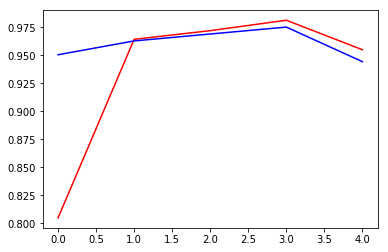

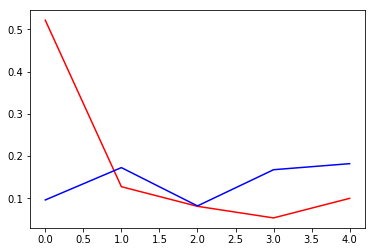

In [18]:
plt.figure(0)
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'b')


plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')

plt.show()